## svm_linear

In [21]:
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        45
           1       0.75      0.20      0.32        30

   micro avg       0.65      0.65      0.65        75
   macro avg       0.70      0.58      0.54        75
weighted avg       0.69      0.65      0.59        75



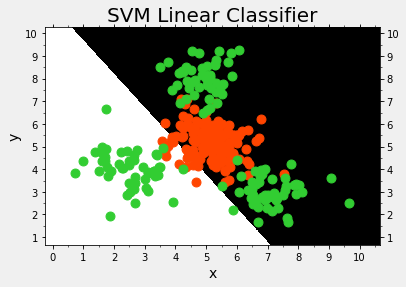

In [5]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y,dtype=int)

def train_model(x,y):
    # 支持向量机的线性分类器
    model = svm.SVC(kernel='linear')
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 提取性能报告
def eval_cr(y,pred_y):
    cr = sm.classification_report(y,pred_y)
    print(cr)
    return cr
    
def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('SVM Linear Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.xaxis.set_minor_locator(mp.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
# 画分类边界    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='gray')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_data(x,y):
    C0,C1 = y==0,y==1
    mp.scatter(x[C0][:,0],x[C0][:,1],c='orangered',s=80)
    mp.scatter(x[C1][:,0],x[C1][:,1],c='limegreen',s=80)
    mp.show()
    
    
def main():
    x,y = read_data('multiple2.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,
                       np.c_[grid_x[0].ravel(),
                            grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    eval_cr(test_y,pred_test_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_data(x,y)
    
    return 0

if __name__ == '__main__':
    main()
    

## 线性不可分数据
一个类的数据被另一个类包围，这种形式的数据属于线性不可分的状态，这种样本不适合用线性分类器

## SVM非线性分类器 （svm_poly）

/Users/kokenhei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.87      0.89        45
           1       0.81      0.87      0.84        30

   micro avg       0.87      0.87      0.87        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.87      0.87      0.87        75



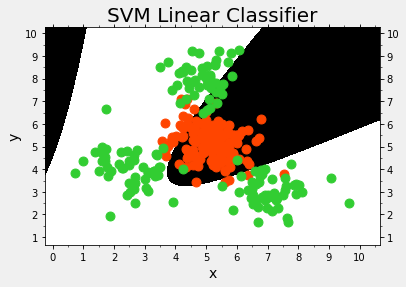

In [6]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y,dtype=int)

def train_model(x,y):
    # 3次多项式
    model = svm.SVC(kernel='poly',degree = 3)
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 提取性能报告
def eval_cr(y,pred_y):
    cr = sm.classification_report(y,pred_y)
    print(cr)
    return cr
    
def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('SVM Linear Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.xaxis.set_minor_locator(mp.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
# 画分类边界    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='gray')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_data(x,y):
    C0,C1 = y==0,y==1
    mp.scatter(x[C0][:,0],x[C0][:,1],c='orangered',s=80)
    mp.scatter(x[C1][:,0],x[C1][:,1],c='limegreen',s=80)
    mp.show()
    
    
def main():
    x,y = read_data('multiple2.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,
                       np.c_[grid_x[0].ravel(),
                            grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    eval_cr(test_y,pred_test_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_data(x,y)
    
    return 0

if __name__ == '__main__':
    main()
    

## SVM径向基函数(RBF)非线性分类器

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        45
           1       0.88      0.97      0.92        30

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75



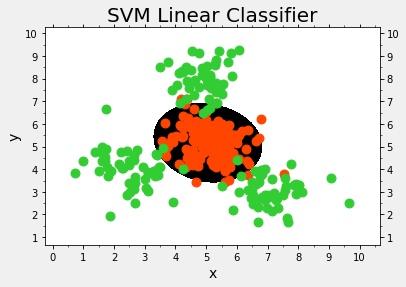

In [8]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y,dtype=int)

def train_model(x,y):
    # 乘法项C=600，
    model = svm.SVC(kernel='rbf',C=600,gamma=0.01)
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 提取性能报告
def eval_cr(y,pred_y):
    cr = sm.classification_report(y,pred_y)
    print(cr)
    return cr
    
def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('SVM Linear Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.xaxis.set_minor_locator(mp.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
# 画分类边界    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='gray')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_data(x,y):
    C0,C1 = y==0,y==1
    mp.scatter(x[C0][:,0],x[C0][:,1],c='orangered',s=80)
    mp.scatter(x[C1][:,0],x[C1][:,1],c='limegreen',s=80)
    mp.show()
    
    
def main():
    x,y = read_data('multiple2.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,
                       np.c_[grid_x[0].ravel(),
                            grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    eval_cr(test_y,pred_test_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_data(x,y)
    
    return 0

if __name__ == '__main__':
    main()

## 解决类型数量不平衡问题

              precision    recall  f1-score   support

           0       0.29      0.76      0.42        42
           1       0.95      0.70      0.80       258

   micro avg       0.71      0.71      0.71       300
   macro avg       0.62      0.73      0.61       300
weighted avg       0.86      0.71      0.75       300



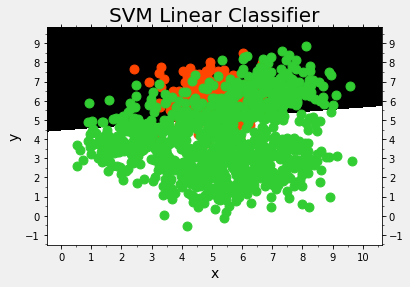

In [11]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y,dtype=int)

def train_model(x,y):
    # 支持向量机的线性分类器,通过class_weight来调节类型变量不平衡的问题
    model = svm.SVC(kernel='linear',class_weight='balanced')
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 提取性能报告
def eval_cr(y,pred_y):
    cr = sm.classification_report(y,pred_y)
    print(cr)
    return cr
    
def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('SVM Linear Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.xaxis.set_minor_locator(mp.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
# 画分类边界    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='gray')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_data(x,y):
    C0,C1 = y==0,y==1
    mp.scatter(x[C0][:,0],x[C0][:,1],c='orangered',s=80)
    mp.scatter(x[C1][:,0],x[C1][:,1],c='limegreen',s=80)
    mp.show()
    
    
def main():
    x,y = read_data('imbalance.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,
                       np.c_[grid_x[0].ravel(),
                            grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    eval_cr(test_y,pred_test_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_data(x,y)
    
    return 0

if __name__ == '__main__':
    main()
    

## 置信度

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        45
           1       0.88      0.97      0.92        30

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75

[[3.00000090e-14 1.00000000e+00]
 [3.00000090e-14 1.00000000e+00]
 [9.76391028e-01 2.36089716e-02]
 [5.93077821e-01 4.06922179e-01]
 [2.99695725e-03 9.97003043e-01]
 [3.13104270e-11 1.00000000e+00]
 [9.50450761e-01 4.95492387e-02]]


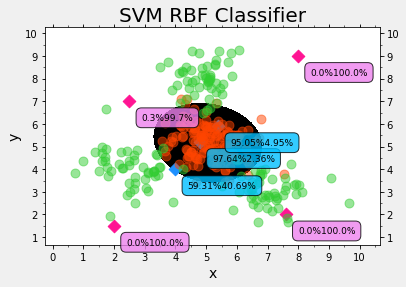

In [20]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y,dtype=int)

def train_model(x,y):
    # 乘法项C=600，
    model = svm.SVC(kernel='rbf',C=600,gamma=0.01,probability=True)
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 提取性能报告
def eval_cr(y,pred_y):
    cr = sm.classification_report(y,pred_y)
    print(cr)
    return cr
    
# 
def make_data():
    x = np.array([
        [2,1.5],
        [8,9],
        [4.8,5.2],
        [4,4],
        [2.5,7],
        [7.6,2],
        [5.4,5.9]
    ])
    return x

# 评估置信概率
def eval_cp(model,x):
    cp = model.predict_proba(x)
    return cp

def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('SVM RBF Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.xaxis.set_minor_locator(mp.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
# 画分类边界    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='gray')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_data(x,y):
    C0,C1 = y==0,y==1
    mp.scatter(x[C0][:,0],x[C0][:,1],c='orangered',s=80,alpha=0.5)
    mp.scatter(x[C1][:,0],x[C1][:,1],c='limegreen',s=80,alpha=0.5)
    mp.show()
    
def draw_cp(cp_x,cp_y,cp):
    C0,C1 = cp_y==0,cp_y==1
    mp.scatter(cp_x[C0][:,0],cp_x[C0][:,1],marker='D',
               c='dodgerblue',s=80)
    mp.scatter(cp_x[C1][:,0],cp_x[C1][:,1],marker='D',
               c='deeppink',s=80)
    for i in range(len(cp[C0])):
        mp.annotate(
            '{}%{}%'.format(round(cp[C0][:,0][i]*100,2),
            round(cp[C0][:,1][i]*100,2)),
            # 点的位置
            xy=(cp_x[C0][:,0][i],cp_x[C0][:,1][i]),
            # 文字偏移
            xytext = (12,-12),
            textcoords = 'offset points',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=9,
            bbox={'boxstyle':'round,pad=0.6',
                  'fc':'deepskyblue','alpha':0.8})
        
    for i in range(len(cp[C1])):
        mp.annotate(
            '{}%{}%'.format(round(cp[C1][:,0][i]*100,2),
            round(cp[C1][:,1][i]*100,2)),
            # 点的位置
            xy=(cp_x[C1][:,0][i],cp_x[C1][:,1][i]),
            # 文字偏移
            xytext = (12,-12),
            textcoords = 'offset points',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=9,
            bbox={'boxstyle':'round,pad=0.6',
                  'fc':'violet','alpha':0.8})
    
    
def main():
    x,y = read_data('multiple2.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,np.c_[grid_x[0].ravel(),grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    eval_cr(test_y,pred_test_y)
    cp_x = make_data()
    cp_y = pred_model(model,cp_x)
    cp = eval_cp(model,cp_x)
    print(cp)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_cp(cp_x,cp_y,cp)
    draw_data(x,y)
    
    return 0

if __name__ == '__main__':
    main()

## 最优超参数

/Users/kokenhei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kokenhei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kokenhei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kokenhei/anaconda3/lib/python3.6/site-p

{'C': 1, 'kernel': 'linear'} 0.5911111111111111
{'C': 10, 'kernel': 'linear'} 0.5911111111111111
{'C': 100, 'kernel': 'linear'} 0.5911111111111111
{'C': 1000, 'kernel': 'linear'} 0.5911111111111111
{'C': 1, 'degree': 2, 'kernel': 'poly'} 0.8844444444444445
{'C': 1, 'degree': 3, 'kernel': 'poly'} 0.8844444444444445
{'C': 1, 'gamma': 1, 'kernel': 'rbf'} 0.96
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 0.9511111111111111
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} 0.8311111111111111
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 0.5333333333333333
{'C': 10, 'gamma': 1, 'kernel': 'rbf'} 0.96
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 0.96
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 0.92
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 0.5244444444444445
{'C': 100, 'gamma': 1, 'kernel': 'rbf'} 0.96
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} 0.9555555555555556
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} 0.9466666666666667
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} 0.7911111111111111
{'C': 1000, 'gamma': 1, 'kernel

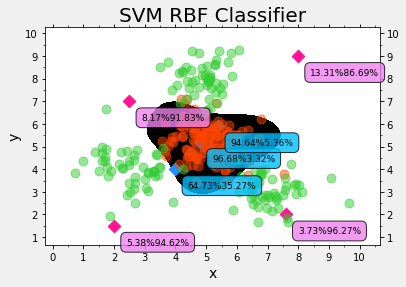

In [22]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y,dtype=int)

def train_model(x,y):
    params = [
        {'kernel':['linear'],'C':[1,10,100,1000]},
        {'kernel':['poly'],'C':[1],'degree':[2,3]},
        {'kernel':['rbf'],'C':[1,10,100,1000],
         'gamma':[1,0.1,0.01,0.001]}
    ]
    model = ms.GridSearchCV(svm.SVC(probability=True),params,
                            cv=5)
    model.fit(x,y)
    for i,param in enumerate(model.cv_results_['params']):
        print(param,model.cv_results_['mean_test_score'][i])
    print(model.best_params_)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 提取性能报告
def eval_cr(y,pred_y):
    cr = sm.classification_report(y,pred_y)
    print(cr)
    return cr
    
# 
def make_data():
    x = np.array([
        [2,1.5],
        [8,9],
        [4.8,5.2],
        [4,4],
        [2.5,7],
        [7.6,2],
        [5.4,5.9]
    ])
    return x

# 评估置信概率
def eval_cp(model,x):
    cp = model.predict_proba(x)
    return cp

def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('SVM RBF Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.xaxis.set_minor_locator(mp.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
# 画分类边界    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='gray')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_data(x,y):
    C0,C1 = y==0,y==1
    mp.scatter(x[C0][:,0],x[C0][:,1],c='orangered',s=80,alpha=0.5)
    mp.scatter(x[C1][:,0],x[C1][:,1],c='limegreen',s=80,alpha=0.5)
    mp.show()
    
def draw_cp(cp_x,cp_y,cp):
    C0,C1 = cp_y==0,cp_y==1
    mp.scatter(cp_x[C0][:,0],cp_x[C0][:,1],marker='D',
               c='dodgerblue',s=80)
    mp.scatter(cp_x[C1][:,0],cp_x[C1][:,1],marker='D',
               c='deeppink',s=80)
    for i in range(len(cp[C0])):
        mp.annotate(
            '{}%{}%'.format(round(cp[C0][:,0][i]*100,2),
            round(cp[C0][:,1][i]*100,2)),
            # 点的位置
            xy=(cp_x[C0][:,0][i],cp_x[C0][:,1][i]),
            # 文字偏移
            xytext = (12,-12),
            textcoords = 'offset points',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=9,
            bbox={'boxstyle':'round,pad=0.6',
                  'fc':'deepskyblue','alpha':0.8})
        
    for i in range(len(cp[C1])):
        mp.annotate(
            '{}%{}%'.format(round(cp[C1][:,0][i]*100,2),
            round(cp[C1][:,1][i]*100,2)),
            # 点的位置
            xy=(cp_x[C1][:,0][i],cp_x[C1][:,1][i]),
            # 文字偏移
            xytext = (12,-12),
            textcoords = 'offset points',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=9,
            bbox={'boxstyle':'round,pad=0.6',
                  'fc':'violet','alpha':0.8})
    
    
def main():
    x,y = read_data('multiple2.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,np.c_[grid_x[0].ravel(),grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    eval_cr(test_y,pred_test_y)
    cp_x = make_data()
    cp_y = pred_model(model,cp_x)
    cp = eval_cp(model,cp_x)
    print(cp)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_cp(cp_x,cp_y,cp)
    draw_data(x,y)
    
    return 0

if __name__ == '__main__':
    main()

## 事件预测

In [24]:
import numpy as np
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.svm as svm

In [27]:
class DigitEncoder():
    def fit_transform(self,y):
        return y.astype(int)
    
    def transform(self,y):
        return y.astype(int)
    
    def inverse_transform(self,y):
        return y.astype(str)


def read_data(filename):
    data = []
    with open(filename,'r') as f:
        for line in f.readlines():
            data.append(line[:-1].split(','))
                    
    # 删除了转置后的第一行，即星期那一列
    data = np.delete(np.array(data).T,1,0)
    # 为每一个feature建立编码器
    encoders,x = [],[]
    # 此时行表示的是一个feature
    for row in range(len(data)):
        # 建立标签编码器
        if data[row,0].isdigit():
            encoder = DigitEncoder()
        else:
            encoder = sp.LabelEncoder()
        if row < len(data) -1:
            # 将字符串转化为数字
            x.append(encoder.fit_transform(data[row]))
        else:
            y = encoder.fit_transform(data[row])
        encoders.append(encoder)
    x = np.array(x).T
    # print(encoders)
    # print(set(y))
    return encoders,x,y

def train_model(x,y):
    model = svm.SVC(kernel='rbf',class_weight='balanced')
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

def eval_cv(model,x,y):
    # cv=10 表示总共交叉验证10次，交叉验证得分

    ac = ms.cross_val_score(model,x,y,cv=3,
                        scoring='accuracy')
    print(round(ac.mean(),2))

# 评估精度，evaluate acurate
def eval_ac(y,pred_y):
    ac = ((y == pred_y).sum() / pred_y.size)
    print('Accuracy:{}%'.format(round(ac * 100, 2)))
    
def make_data(encoders):
    data = [['Tuesday','12:30:00','21','23']]
    data = np.array(data).T
    x = []
    for row in range(len(data)):
        encoder = encoders[row]
        # 将字符串转化为数字
        x.append(encoder.transform(data[row]))
    x = np.array(x).T
    return x
    
def main():
    encoders,x,y = read_data('event.txt')
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    eval_cv(model,x,y)
    pred_test_y = pred_model(model,test_x)
    eval_ac(test_y,pred_test_y)
    x = make_data(encoders)
    pred_y = pred_model(model,x)
    print(encoders[-1].inverse_transform(pred_y))
    return 0

if __name__ == '__main__':
    main()
    

/Users/kokenhei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kokenhei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kokenhei/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kokenhei/anaconda3/lib/python3.6/site-p

0.94
Accuracy:94.6%
['noevent']
